# Image Classification with CIFAR10 : Part 2

Part 2 of the project uses the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) in Tensorflow to perform image classification using CIFAR10. You should complete [Part 1](https://courses.cs.washington.edu/courses/csep576/20sp/projects/Project3_1.html) first. Part 1 is worth 60% and Part 2 worth 40% of the overall mark.

**Getting Started:** The source files for this project are [here](https://courses.cs.washington.edu/courses/csep576/20sp/projects/project3/project3.zip). To run locally, you will need [IPython/Jupyter](http://jupyter.org/install.html) as well as [Tensorflow](https://www.tensorflow.org/install) installed. Launch Jupyter and open `Project3_2.ipynb`. You can also import this notebook directly into [Colaboratory](https://colab.research.google.com/) without installing anything.

**This project:** You'll start by replicating the linear classifier from [Part 1](https://courses.cs.washington.edu/courses/csep576/20sp/projects/Project3_1.html) using the Keras Sequential API. This will give a performance baseline. You'll then work on improved model designs using convolutional layers and tune parameters to get good classification performance.

**What to turn in:** Hand in a zipfile containing your completed .ipynb notebook and any .py files you created. Be sure to describe clearly the results of your investigations.

version `050420`

### Copyright 2020 Google LLC

Licensed under the Apache License, Version 2.0 (the "License"); 
This is not an official Google product.

In [1]:
#@title 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# edit this line to change the figure size
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams['font.size'] = 16
# may be needed to avoid mulitply defined openmp libs
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

### Download CIFAR10 dataset

We use `keras.datasets` to download the CIFAR10 data, splitting off 1000 images from the training set for validation. The dataset will be cached at `~/.keras/datasets` by default.

frog


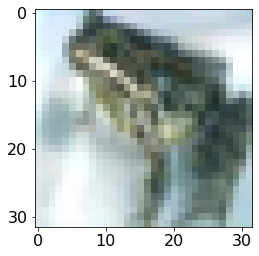

In [33]:
# Load CIFAR10 dataset
(train_images0,train_labels0),(test_images,test_labels) = keras.datasets.cifar10.load_data()

# Normalise images
train_images0=train_images0.astype('float')/255.0
test_images=test_images.astype('float')/255.0

# Create a validation set
num_valid=1000
valid_images=train_images0[0:num_valid]
valid_labels=train_labels0[0:num_valid]
train_images=train_images0[num_valid:]
train_labels=train_labels0[num_valid:]

cifar10_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
num_classes=10
num_train=train_labels.size
num_valid=valid_labels.size
num_test=test_labels.size

# Make one-hot targets
train_one_hot=tf.one_hot(train_labels[:,0],num_classes)
valid_one_hot=tf.one_hot(valid_labels[:,0],num_classes)
test_one_hot=tf.one_hot(test_labels[:,0],num_classes)

# Show a random image and label
rnd=np.random.randint(num_train)
plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(train_images[rnd])
print(cifar10_names[train_labels[rnd][0]])

### Define a Linear model using Keras [10%]

We'll start by replicating the linear model from [Part 1](https://courses.cs.washington.edu/courses/csep576/20sp/projects/Project3_1.html). Use the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to define a linear model over the input pixels. Complete the code below Hint: try `layers.Flatten` and `layers.Dense`. Check that your layer outputs have the right shape. How many parameters does your model have?

#### A: Model has 30730 parameters

In [34]:
# Initialize a Keras sequential model
model=keras.models.Sequential()

#FORNOW: placeholder model, replace this with your own model
#model.add(layers.Conv2D(filters=10,kernel_size=1,input_shape=(32,32,3)))
#model.add(layers.GlobalAveragePooling2D())

"""
*************************************************************
*** TODO: implement a linear model using Keras Sequential API
*************************************************************

The model should compute a single linear function of the input pixels
"""        

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes))


"""
*************************************************************
"""

# output a summary of the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


### Train the model

Use the code below to train the model with squared-error loss between logits and targets. Try a few different optimizers and loss functions, and running for additional epochs. Which combination works best? Can you modify the model to implement softmax regression? How could you add regularization (L2 penalty) on the weights?

#### Trying combinations of opt=['sgd', 'adam'] and loss=['mse', 'categorical-crossentropy'] each with epoch=10, with added softmax regression and L2 penalty

#### After running the model configurations below, best performance was found with opt='sgd', loss='categorical-crossentropy'



In [35]:
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

"""
******************************************************************
*** TODO: test different training parameters for linear regression
******************************************************************
"""


"""
******************************************************************
"""

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 52us/sample - loss: 0.1100 - accuracy: 0.2040 - val_loss: 0.1269 - val_accuracy: 0.1800
Epoch 2/10
49000/49000 [==============================] - 2s 46us/sample - loss: 0.0974 - accuracy: 0.2484 - val_loss: 0.1073 - val_accuracy: 0.2410
Epoch 3/10
49000/49000 [==============================] - 2s 48us/sample - loss: 0.0939 - accuracy: 0.2655 - val_loss: 0.1075 - val_accuracy: 0.1790
Epoch 4/10
49000/49000 [==============================] - 2s 50us/sample - loss: 0.0924 - accuracy: 0.2816 - val_loss: 0.0995 - val_accuracy: 0.2060
Epoch 5/10
49000/49000 [==============================] - 2s 42us/sample - loss: 0.0909 - accuracy: 0.2885 - val_loss: 0.1313 - val_accuracy: 0.1730
Epoch 6/10
49000/49000 [==============================] - 2s 43us/sample - loss: 0.0900 - accuracy: 0.2956 - val_loss: 0.1112 - val_accuracy: 0.1520
Epoch 7/10
49000/49000 [==============================] -

'\n******************************************************************\n'

In [36]:
opt = 'sgd'
loss = 'mean_squared_error'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 53us/sample - loss: 0.1075 - accuracy: 0.1742 - val_loss: 0.1049 - val_accuracy: 0.2070
Epoch 2/10
49000/49000 [==============================] - 2s 49us/sample - loss: 0.1033 - accuracy: 0.2455 - val_loss: 0.1017 - val_accuracy: 0.2540
Epoch 3/10
49000/49000 [==============================] - 2s 46us/sample - loss: 0.1006 - accuracy: 0.2825 - val_loss: 0.0993 - val_accuracy: 0.3010
Epoch 4/10
49000/49000 [==============================] - 2s 45us/sample - loss: 0.0985 - accuracy: 0.3030 - val_loss: 0.0973 - val_accuracy: 0.3110
Epoch 5/10
49000/49000 [==============================] - 2s 48us/sample - loss: 0.0968 - accuracy: 0.3188 - val_loss: 0.0958 - val_accuracy: 0.3240
Epoch 6/10
49000/49000 [==============================] - 2s 50us/sample - loss: 0.0954 - accuracy: 0.3327 - val_loss: 0.0943 - val_accuracy: 0.3360
Epoch 7/10
49000/49000 [==============================] -

In [39]:
opt = 'sgd'
loss = 'categorical_crossentropy'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 4s 90us/sample - loss: 1.9696 - accuracy: 0.3002 - val_loss: 1.9708 - val_accuracy: 0.3090
Epoch 2/10
49000/49000 [==============================] - 4s 85us/sample - loss: 1.8677 - accuracy: 0.3503 - val_loss: 1.8957 - val_accuracy: 0.3320
Epoch 3/10
49000/49000 [==============================] - 5s 104us/sample - loss: 1.8390 - accuracy: 0.3634 - val_loss: 1.9694 - val_accuracy: 0.3190
Epoch 4/10
49000/49000 [==============================] - 4s 76us/sample - loss: 1.8250 - accuracy: 0.3701 - val_loss: 1.8640 - val_accuracy: 0.3540
Epoch 5/10
49000/49000 [==============================] - 4s 78us/sample - loss: 1.8121 - accuracy: 0.3754 - val_loss: 2.0274 - val_accuracy: 0.2920
Epoch 6/10
49000/49000 [==============================] - 5s 93us/sample - loss: 1.8017 - accuracy: 0.3804 - val_loss: 1.9555 - val_accuracy: 0.3240
Epoch 7/10
49000/49000 [==============================] 

In [37]:
opt = 'adam'
loss = 'mean_squared_error'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 61us/sample - loss: 0.0933 - accuracy: 0.2692 - val_loss: 0.0886 - val_accuracy: 0.2630
Epoch 2/10
49000/49000 [==============================] - 3s 52us/sample - loss: 0.0874 - accuracy: 0.2935 - val_loss: 0.0898 - val_accuracy: 0.2690
Epoch 3/10
49000/49000 [==============================] - 3s 52us/sample - loss: 0.0885 - accuracy: 0.2869 - val_loss: 0.0871 - val_accuracy: 0.2970
Epoch 4/10
49000/49000 [==============================] - 4s 77us/sample - loss: 0.0883 - accuracy: 0.2873 - val_loss: 0.0823 - val_accuracy: 0.3370
Epoch 5/10
49000/49000 [==============================] - 4s 81us/sample - loss: 0.0872 - accuracy: 0.2937 - val_loss: 0.0818 - val_accuracy: 0.3410
Epoch 6/10
49000/49000 [==============================] - 4s 84us/sample - loss: 0.0877 - accuracy: 0.2923 - val_loss: 0.0884 - val_accuracy: 0.2830
Epoch 7/10
49000/49000 [==============================] -

In [38]:
opt = 'adam'
loss = 'categorical_crossentropy'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 7s 147us/sample - loss: 1.9899 - accuracy: 0.3142 - val_loss: 1.8419 - val_accuracy: 0.3670
Epoch 2/10
49000/49000 [==============================] - 6s 127us/sample - loss: 1.9058 - accuracy: 0.3485 - val_loss: 1.8536 - val_accuracy: 0.3520
Epoch 3/10
49000/49000 [==============================] - 10s 209us/sample - loss: 1.8907 - accuracy: 0.3598 - val_loss: 1.8026 - val_accuracy: 0.3670
Epoch 4/10
49000/49000 [==============================] - 9s 180us/sample - loss: 1.8757 - accuracy: 0.3685 - val_loss: 1.8789 - val_accuracy: 0.3580
Epoch 5/10
49000/49000 [==============================] - 7s 140us/sample - loss: 1.8664 - accuracy: 0.3701 - val_loss: 1.8260 - val_accuracy: 0.3790
Epoch 6/10
49000/49000 [==============================] - 5s 108us/sample - loss: 1.8667 - accuracy: 0.3684 - val_loss: 1.8636 - val_accuracy: 0.3540
Epoch 7/10
49000/49000 [==========================

Reintialize the model with opt='sgd', loss='categorical_crossentropy'

In [40]:
opt = 'sgd'
loss = 'categorical_crossentropy'

model=keras.models.Sequential()     

model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('softmax'))

model.compile(optimizer=opt, loss=loss,metrics=['accuracy'])
history = model.fit(train_images,train_one_hot,epochs=10,validation_data=(valid_images, valid_one_hot))

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 3s 56us/sample - loss: 1.9690 - accuracy: 0.3040 - val_loss: 1.8591 - val_accuracy: 0.3600
Epoch 2/10
49000/49000 [==============================] - 2s 48us/sample - loss: 1.8676 - accuracy: 0.3527 - val_loss: 2.4416 - val_accuracy: 0.2320
Epoch 3/10
49000/49000 [==============================] - 2s 46us/sample - loss: 1.8421 - accuracy: 0.3607 - val_loss: 2.1645 - val_accuracy: 0.2570
Epoch 4/10
49000/49000 [==============================] - 2s 48us/sample - loss: 1.8257 - accuracy: 0.3691 - val_loss: 1.9708 - val_accuracy: 0.3110
Epoch 5/10
49000/49000 [==============================] - 2s 44us/sample - loss: 1.8114 - accuracy: 0.3753 - val_loss: 1.8885 - val_accuracy: 0.3380
Epoch 6/10
49000/49000 [==============================] - 2s 45us/sample - loss: 1.8050 - accuracy: 0.3801 - val_loss: 2.3590 - val_accuracy: 0.2280
Epoch 7/10
49000/49000 [==============================] -

### Run the model

The following code demonstrates use of `model.predict`. Run the following code to demonstrate running the model on a single input.

predicted = ship
actual = bird


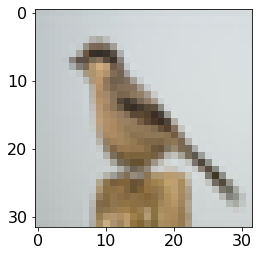

In [48]:
rnd=np.random.randint(num_test)
test_image_rnd=test_images[rnd]
test_label_rnd=test_labels[rnd][0]
logits=model.predict(np.expand_dims(test_image_rnd,0))
label_pred=np.argmax(logits)
plt.imshow(test_image_rnd)
print('predicted =',cifar10_names[label_pred])
print('actual =',cifar10_names[test_label_rnd])

### Design a new model [5%]

Design your own convolutional net choosing your own set of layers. In the next block, you'll train, tune and visualize outputs from this model.

In [52]:
"""
****************************************************
*** TODO: design a convolutional network for CIFAR10
****************************************************

Design a model to perform CIFAR10 classification
"""     

model=keras.models.Sequential()
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

"""
****************************************************
"""

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_22 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                250890    
Total params: 271,146
Trainable params: 271,146
Non-trainable params: 0
_________________________________________________________________


'\n****************************************************\n'

### Train, Tune and Visualize the Model [25%]

Train your model and plot training and validation accuracy as a function of time (steps or epochs). Choose some model parameters (e.g., number of layers, filters per layer, kernel size) and study the affect of their settings on performance. Show your findings with plots or tables with validation accuracy as a function of the parameters in your study. Visualize some aspect of your model, e.g., first layer weights, activation distributions. How do they evolve over time?

Train on 49000 samples, validate on 1000 samples
Epoch 1/5
49000/49000 [==============================] - 205s 4ms/sample - loss: 1.7954 - accuracy: 0.3642 - val_loss: 1.6647 - val_accuracy: 0.3730
Epoch 2/5
49000/49000 [==============================] - 140s 3ms/sample - loss: 1.4778 - accuracy: 0.4783 - val_loss: 1.5803 - val_accuracy: 0.4320
Epoch 3/5
49000/49000 [==============================] - 166s 3ms/sample - loss: 1.3302 - accuracy: 0.5315 - val_loss: 1.3048 - val_accuracy: 0.5220
Epoch 4/5
49000/49000 [==============================] - 200s 4ms/sample - loss: 1.2364 - accuracy: 0.5665 - val_loss: 1.3138 - val_accuracy: 0.5310
Epoch 5/5
49000/49000 [==============================] - 161s 3ms/sample - loss: 1.1638 - accuracy: 0.5918 - val_loss: 1.2050 - val_accuracy: 0.5720


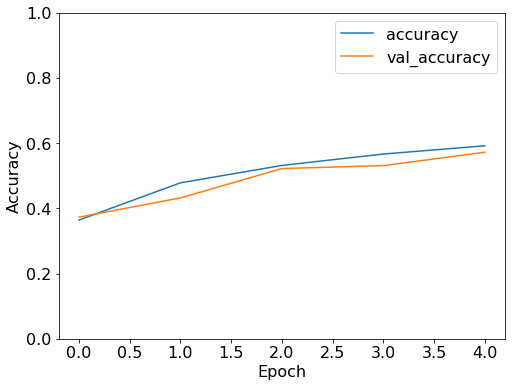

In [53]:
# FORNOW: train model with sgd for 5 epochs
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_one_hot, epochs=5, validation_data=(valid_images, valid_one_hot))

"""
*********************************************
*** TODO: train, tune and visualize CNN model
*********************************************
"""    


"""
*********************************************
"""

# Example of plotting training and validation accuracy vs epoch
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

### Evaluate the model

Use the code below to compute the final accuracy of your model on the test set.

In [ ]:
# Compute accuracy on the test set
test_loss, test_acc = model.evaluate(test_images,test_one_hot,verbose=2)

#